In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def calculatePercentiles(df, device):
    print("="*50)
    print(device)
    print("-"*10, "Detection Time", "-"*10)
    print("Max : ",df['detection_time'].max())
    print("Min : ",df['detection_time'].min())
    print("Median : ",df['detection_time'].median())
    print("90th Percentile: ",df['detection_time'].quantile(0.90))
    print("95th Percentile: ",df['detection_time'].quantile(0.95))
    print("99th Percentile: ",df['detection_time'].quantile(0.99))
    print("-"*10, "Classifier Time", "-"*10)
    print("Max : ",df['classifier_time'].max())
    print("Min : ",df['classifier_time'].min())
    print("Median : ",df['classifier_time'].median())
    print("90th Percentile: ",df['classifier_time'].quantile(0.90))
    print("95th Percentile: ",df['classifier_time'].quantile(0.95))
    print("99th Percentile: ",df['classifier_time'].quantile(0.99))
    print("-"*10, "Total Time", "-"*10)
    print("Max : ",df['total'].max())
    print("Min : ",df['total'].min())
    print("Median : ",df['total'].median())
    print("90th Percentile: ",df['total'].quantile(0.90))
    print("95th Percentile: ",df['total'].quantile(0.95))
    print("99th Percentile: ",df['total'].quantile(0.99))
    print("="*50)

In [3]:
df1=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_bodypose/AGX_bodypose_output.csv")
df2=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_bodypose/Nano_bodypose_output.csv")
df3=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_bodypose/NX_bodypose_output.csv")
# df4=pd.read_csv("/home/drone/Downloads/IPDPS/outputs_bodypose/4090_bodypose_output.csv")

df1['detection_time'] *=1000
df2['detection_time'] *=1000
df3['detection_time'] *=1000
# df4['detection_time'] *=1000

df1['classifier_time'] *=1000
df2['classifier_time'] *=1000
df3['classifier_time'] *=1000
# df4['classifier_time'] *=1000

df1['total'] = df1['detection_time'] + df1['classifier_time']
df2['total'] = df2['detection_time'] + df2['classifier_time']
df3['total'] = df3['detection_time'] + df3['classifier_time']
# df4['total'] = df4['detection_time'] + df4['classifier_time']

# Dropping max value
df1=df1.loc[df1['detection_time']!=df1['detection_time'].max()]
df2=df2.loc[df2['detection_time']!=df2['detection_time'].max()]
df3=df3.loc[df3['detection_time']!=df3['detection_time'].max()]
# df4=df4.loc[df4['detection_time']!=df4['detection_time'].max()]

df1=df1.loc[df1['classifier_time']!=df1['classifier_time'].max()]
df2=df2.loc[df2['classifier_time']!=df2['classifier_time'].max()]
df3=df3.loc[df3['classifier_time']!=df3['classifier_time'].max()]
# df4=df4.loc[df4['classifier_time']!=df4['classifier_time'].max()]

df1["model"] = "Orin AGX"
df2["model"] = "Orin Nano"
df3["model"] = "Xavier NX"
# df4["model"] = "4090"

# calculatePercentiles(df4, "4090")
calculatePercentiles(df1, "Orin AGX")
calculatePercentiles(df2, "Orin Nano")
calculatePercentiles(df3, "Xavier NX")

df_combined = pd.concat([df1, df2, df3])

Orin AGX
---------- Detection Time ----------
Max :  37.9858016967773
Min :  23.571252822875902
Median :  28.121352195739654
90th Percentile:  29.991364479064913
95th Percentile:  35.78875064849849
99th Percentile:  36.541848182678144
---------- Classifier Time ----------
Max :  0.000476837158203125
Min :  0.0
Median :  0.0002384185791015625
90th Percentile:  0.000476837158203125
95th Percentile:  0.000476837158203125
99th Percentile:  0.000476837158203125
---------- Total Time ----------
Max :  37.9860401153564
Min :  23.571491241455004
Median :  28.121590614318755
90th Percentile:  29.991626739501925
95th Percentile:  35.788989067077594
99th Percentile:  36.542086601257246
Orin Nano
---------- Detection Time ----------
Max :  44.0642833709716
Min :  25.4416465759277
Median :  26.9923210144042
90th Percentile:  29.694318771362283
95th Percentile:  31.040859222412077
99th Percentile:  34.16781425476071
---------- Classifier Time ----------
Max :  0.0007152557373046875
Min :  0.00023841

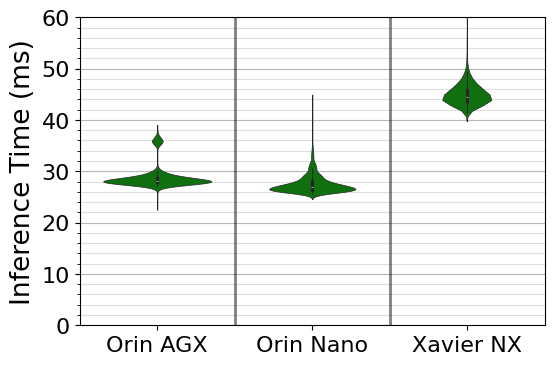

In [6]:

# Create a violin plot for the Time column
plt.figure(figsize=(6, 4))

# Create the merged violin plot with boxplot/median indicator inside
# ax = sns.violinplot(x='Model', y='Difference', data=df_combined, zorder=2, inner='box', width=1.0, linewidth=0.5, color='green', legend=False)  # No internal plot yet
ax = sns.violinplot(x='model', y='total', data=df_combined, zorder=2, inner='box', width=0.7, linewidth=0.5, color='green', legend=False)


# Set the title18
# plt.title("Inferencing Time on Orin AGX", fontsize=7)

# Customize Y-axis (time in ms)
plt.ylabel("Inference Time (ms)", fontsize=19)
# plt.xlabel("Model", fontsize=10)
plt.xlabel("", fontsize=0)

# Customize Y-ticks
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Set limits for y-axis (set max to 500)
plt.ylim(0, 60)  # Clip the plot at 300
ax.set_yticks(np.arange(0, 61, 10))
ax.tick_params(axis='x', which='minor', bottom=False)

# ax.grid(which='minor', axis='y', linestyle='-')
ax.grid(which='minor', axis='y', linestyle='-',alpha=0.4)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.9)

# Customize grid lines and minor ticks
plt.minorticks_on()  # Enable minor ticks (needed for minor grid lines)


# To add vertical lines for x-axis to distinguish between different devices
xticks = ax.get_xticks()
for i in range(len(xticks) - 1):
    midpoint = (xticks[i] + xticks[i + 1]) / 2
    ax.axvline(midpoint, color='k', linestyle='-', alpha=0.5, linewidth=2)

# Save the plot as a PNG file
out_path="/home/drone/Downloads/IPDPS/outputs_bodypose/"
outfile=out_path+"3_bodypose"
plt.savefig(outfile+".png", dpi=700, bbox_inches='tight')
plt.savefig(outfile+".pdf", dpi=700, bbox_inches='tight', format='pdf')

# Show the plot
plt.show()